# Descriptive statistics

In [4]:
import pandas as pd

In [5]:
finance = pd.read_csv("finance_clean.csv")

In [57]:
finance.head(3)

,Oficina,Fecha operacion,Ingreso (+),Gasto (-),Concepto origen,Concepto destino,Ingreso y Gasto,Saldo
0,9736,2019-04-17,NaN,1.73,,BON AREA,-1.73,126.98
1,9792,2019-04-17,8.0,NaN,00810900-ADRIA FERRER ABAD,TRANSF. A SU FAVOR,8.00,128.71
2,9792,2019-04-17,9.0,NaN,00810053-PAU SAMPIETRO FABREGAS,TRANSF. A SU FAVOR,9.00,120.71


In [94]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 8 columns):
Oficina             1225 non-null int64
Fecha operacion     1225 non-null object
Ingreso (+)         147 non-null float64
Gasto (-)           1078 non-null float64
Concepto origen     1225 non-null object
Concepto destino    1225 non-null object
Ingreso y Gasto     1225 non-null float64
Saldo               1225 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 76.6+ KB


In [95]:
finance.describe(include=['float64']) 

,Ingreso (+),Gasto (-),Ingreso y Gasto,Saldo
count,147.000000,1078.000000,1225.000000,1225.000000
mean,213.035510,28.998896,0.045233,953.227722
std,497.066092,121.614188,220.626968,864.934179
min,0.850000,0.020000,-2000.000000,-11.840000
25%,9.995000,2.500000,-14.000000,402.900000
50%,50.000000,6.300000,-4.990000,727.540000
75%,175.000000,17.230000,-1.600000,1169.510000
max,4000.780000,2000.000000,4000.780000,4938.610000


## Measures of centralization:

#### The data is clearly unbalanced. There are seven times more expenses than entries. On the other hand, the average expense is seven times smaller than the average entry.

## Measures of dispertion:

#### It is worth pointing out that the standard deviation of the entries and the total balance is much higher than of the expenses. There is a much lower dispertion in expenses, so probably much higher density in the middle of the distribution.

### Looking at the interquartile range (25% to 75%):

#### Income is mostly 10 euros to 175 euros. Expenses are mostly between 2.5 euros and 17.23 euros. Balance mst of the time is between 405 euros and 1170.21 euros.

# Plots

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Visually confirm centralization/dispertion analysis

(array([1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 6.000e+00, 1.500e+01,
        1.152e+03, 2.900e+01, 7.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-2000.   , -1699.961, -1399.922, -1099.883,  -799.844,  -499.805,
         -199.766,   100.273,   400.312,   700.351,  1000.39 ,  1300.429,
         1600.468,  1900.507,  2200.546,  2500.585,  2800.624,  3100.663,
         3400.702,  3700.741,  4000.78 ]),
 <a list of 20 Patch objects>)

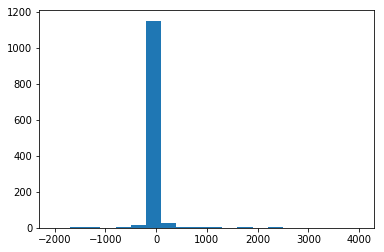

In [17]:
plt.hist(finance["Ingreso y Gasto"], bins = 20) 

### Hypothesis test -> Is the distribution of Income and Outcome normal?

In [51]:
#### The answer is clear by seeing at the graph but one of the main goals was to demostrate statistically that it was:

In [44]:
from scipy import stats

In [45]:
k2, p = stats.normaltest(finance["Ingreso y Gasto"])

In [48]:
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


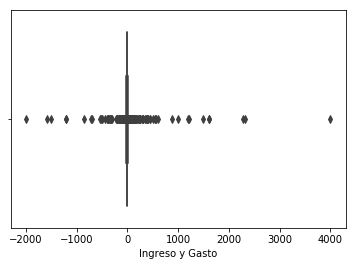

In [66]:
sns.boxplot(x=finance["Ingreso y Gasto"])

#### Expenses and income are extremely centered around 0

(array([180., 213., 223., 174., 146.,  89.,  43.,  18.,  16.,  20.,  30.,
         26.,   9.,   2.,   4.,  24.,   0.,   1.,   1.,   6.]),
 array([ -11.84  ,  235.6825,  483.205 ,  730.7275,  978.25  , 1225.7725,
        1473.295 , 1720.8175, 1968.34  , 2215.8625, 2463.385 , 2710.9075,
        2958.43  , 3205.9525, 3453.475 , 3700.9975, 3948.52  , 4196.0425,
        4443.565 , 4691.0875, 4938.61  ]),
 <a list of 20 Patch objects>)

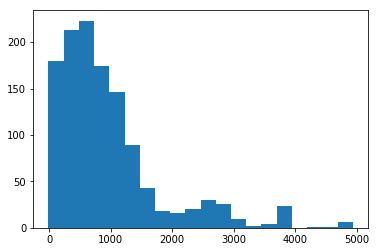

In [13]:
plt.hist(finance["Saldo"], bins = 20) 

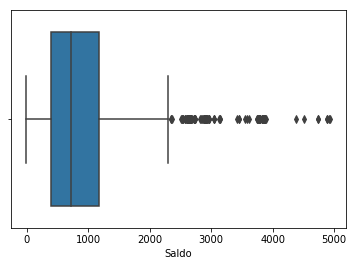

In [67]:
sns.boxplot(x=finance["Saldo"])

#### It is clear that high income can be defined as an outlier and doesn't happen often (probably paid by day or week and not by month)

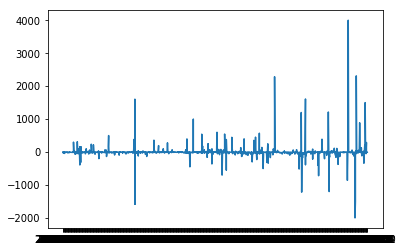

In [72]:
plt.plot(finance["Fecha operacion"], finance["Ingreso y Gasto"]) # High peaks are sometimes observed but most transactions are in the middle

#### There are big fluctuations in the income + expense, some outliers of big income/expense appears on the graph but most is gravitated to the center

In [20]:
sum_expense = finance.groupby('Concepto destino').sum()

In [25]:
sum_expense.sort_values(by=['Gasto (-)'], ascending=False)['Gasto (-)'].head(3)

Concepto destino
C.CAIXAFUTURO-PIAS                        4000.00
REINT.CAJERO                              3400.00
PAGO DE RECIBOS                           1587.26
Name: Gasto (-), dtype: float64

#### The biggest expense has been a saving account

In [23]:
sum_income = finance.groupby('Concepto origen').sum()

In [56]:
sum_income.sort_values(by=['Ingreso (+)'], ascending=False)['Ingreso (+)'].head(3)

Concepto origen
                                          17691.90
Transferwise Ltd                           4976.68
BEQUES I AJUTS 2014                        2387.86
Name: Ingreso (+), dtype: float64

#### The biggest source of income without a blank value in "concept" is "Transferwise Ltd", probably my own English account

In [30]:
finance['Concepto destino'].value_counts().head(3)

REINT.CAJERO                              57
LIDL C PUJADES                            54
CAFETERIA DEL MOL                         53
Name: Concepto destino, dtype: int64

#### 57 trasactions with "outcome concept" were getting money from an automatic cash machine and 54 towards a supermarket

In [34]:
finance['Concepto origen'].value_counts().head(3)

                                          1136
A66098435000                                20
01823298-MIREIA GOMEZ GORDO                 17
Name: Concepto origen, dtype: int64

#### 20 transactions with "income concept" come from A66098435000 and 17 come from girlfriend "mireia"